<h1>PROJECT3 - PH DENGUE CASES ANALYSIS</h1>

<H2>Analyst: Gerald Prio</H2>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h2>Changing Data Types</h2>

In [9]:
dengue['Year'] = dengue['Year'].astype('int')
region_order = ['BARMM', 'CAR', 'NCR', 'Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', 'Region IX', 'Region V', 'Region VI', 'Region VII', 'Region VIII', 'Region X', 'Region XI', 'Region XII', 'Region XIII']
dengue['Region'] = pd.Categorical(dengue['Region'], categories=region_order, ordered=True)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<H1>EXPLANATORY DATA ANALYSIS (EDA)</H1>

<H3>1. DENGUE CASES TREND FROM 2016 - 2020</H3>

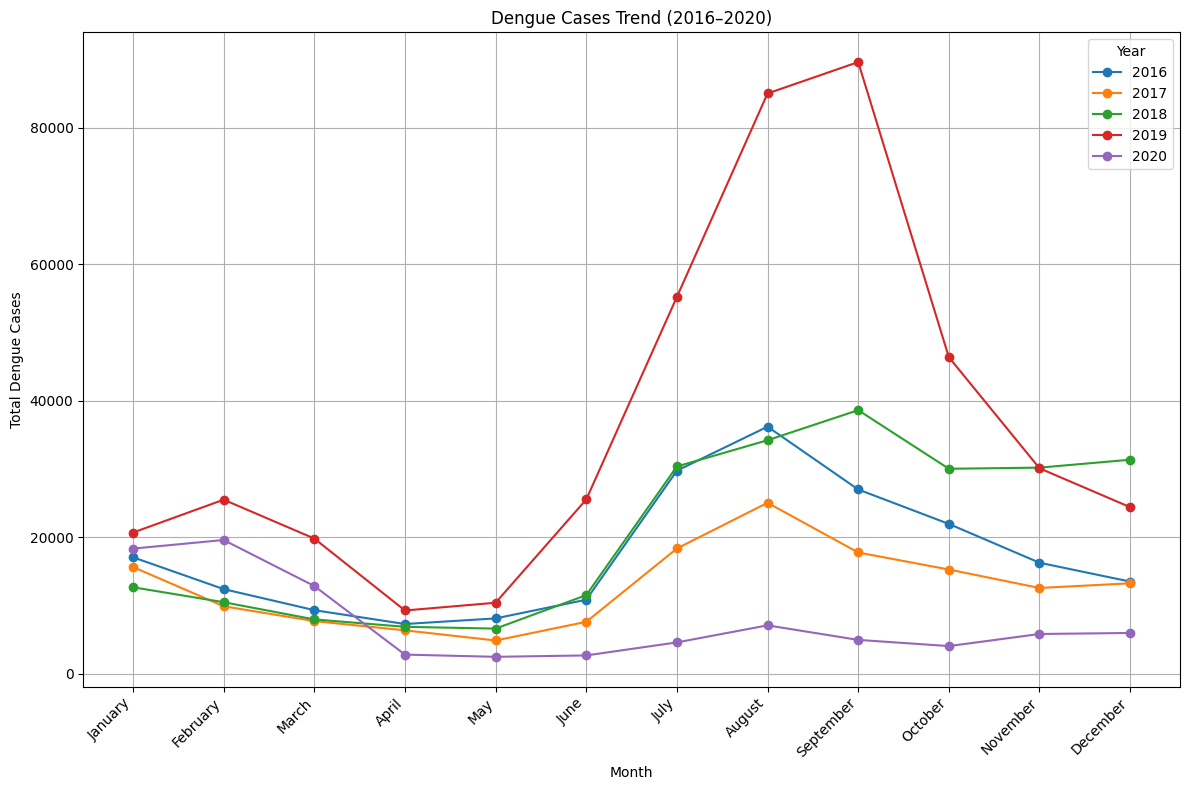

In [13]:
monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line', marker='o')
plt.gcf().set_size_inches(12, 8)
plt.title('Dengue Cases Trend (2016–2020)')
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.grid(True)
plt.xticks(range(0, 12), month_order, rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

<h2>INSIGHT 1:</h2> 
<p>In 2016, the Philippines started using the Dengvaxia vaccine to prevent dengue. But later, it was found that the vaccine might cause severe illness for those who never had dengue before. This caused fear and mistrust among the public, and many parents became hesitant to join government health programs. Because of that, by 2019, when the rainy season came, people were less prepared and less protected, leading to one of the biggest dengue outbreaks in the country.</p>
<h2>INSIGHT 2:</h2> 
<p>After the outbreak in 2019, dengue cases noticeably went down in 2020. This may be because of the COVID-19 pandemic, where people stayed inside their homes, followed health protocols, and cleaned their surroundings more often. The lockdowns reduced outdoor exposure and possibly mosquito bites, which helped decrease dengue cases that year.
</p>

<h3>2. MORTALITY RATE PER EACH REGION</h3>

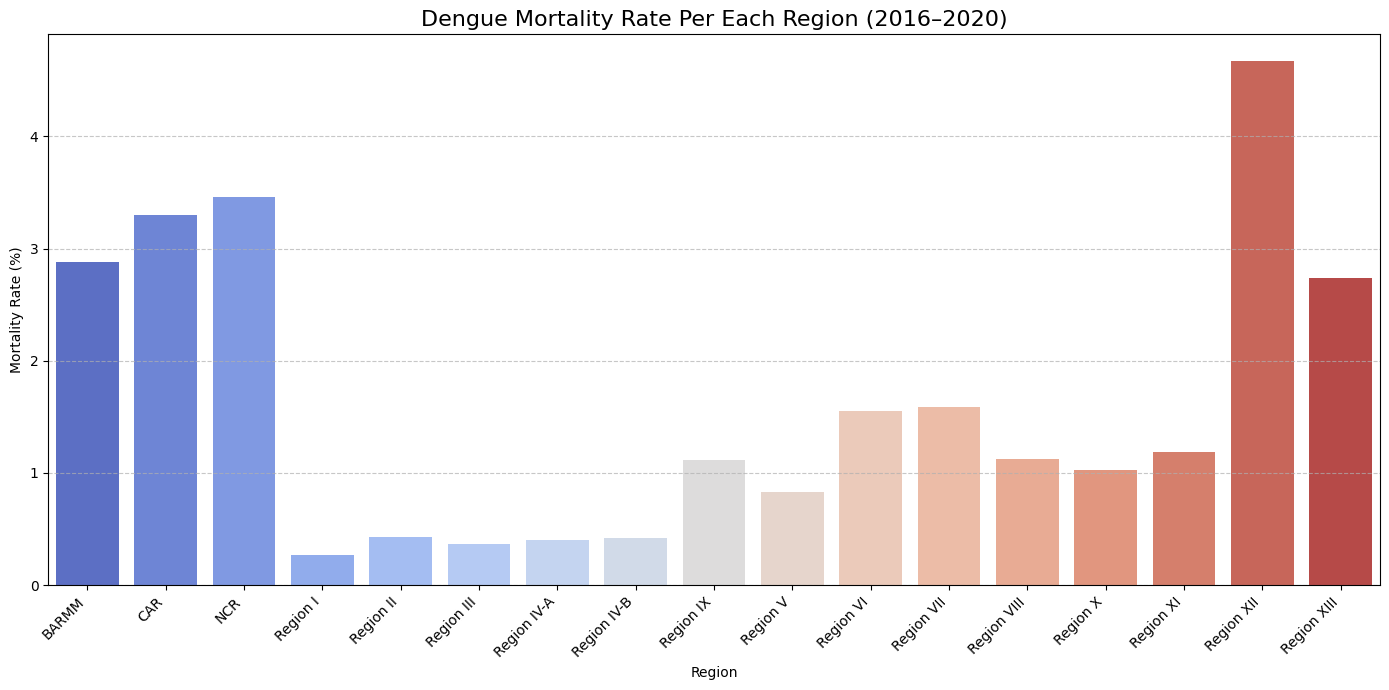

In [24]:
region_stats = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()

region_stats['Mortality_Rate'] = (region_stats['Dengue_Deaths'] / region_stats['Dengue_Cases']) * 100

plt.figure(figsize=(14, 7))
visual1 = sns.barplot(data=region_stats, x='Region', y='Mortality_Rate', palette='coolwarm')

plt.title('Dengue Mortality Rate Per Each Region (2016–2020)', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Mortality Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2>INSIGHT 3:</h2> 
<p>From the chart, we can see that the mortality rate is different for every region. Region XII has the highest mortality rate, which goes above 4%. This shows that people in this area might not have easy access to hospitals or clinics, making it harder for patients to get proper treatment. Because of this, more dengue cases may have ended in death compared to other regions.
</p>
<h2>INSIGHT 4:</h2> 
<p>On the other hand, Regions I, II, III, IV-A, and IV-B have the lowest mortality rates, all staying below 1%. This means that even though there were dengue cases, these regions were able to handle them well. They might have better healthcare services and faster medical help, which helped reduce the number of deaths.
</p>

<h3>3. DENGUE CASES PER EACH REGION</h3>

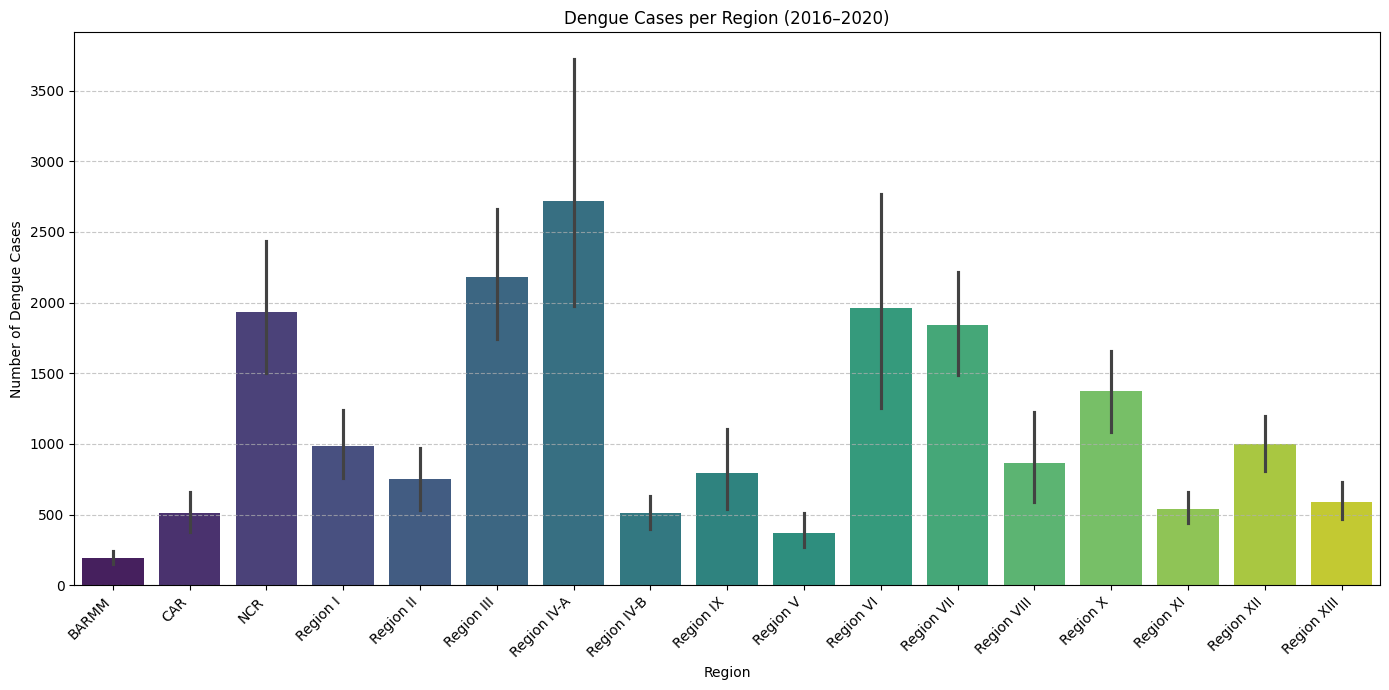

In [23]:
plt.figure(figsize=(14, 7))
sns.barplot(data=dengue, x='Region', y='Dengue_Cases', palette='viridis')

plt.title('Dengue Cases per Region (2016–2020)')
plt.xlabel('Region')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2>INSIGHT 5:</h2>
<P>The chart shows that dengue cases were highest in the country’s most crowded and urbanized areas, especially in NCR, Region III, and Region IV-A (CALABARZON). These places have large populations and busy environments, which make it easier for dengue to spread. Factors such as poor waste management, stagnant water, and congested housing create perfect spots for mosquitoes to breed.</P>
<H2>INSIGHT 6:</H2>
<P>Meanwhile, the BARMM, CAR, and Region V regions had the lowest number of dengue cases from 2016 to 2020. People in these regions might be more aware of keeping their surroundings clean to avoid getting dengue.</P>

<H2>4. DENGUE DEATHS PER EACH REGION</H2>

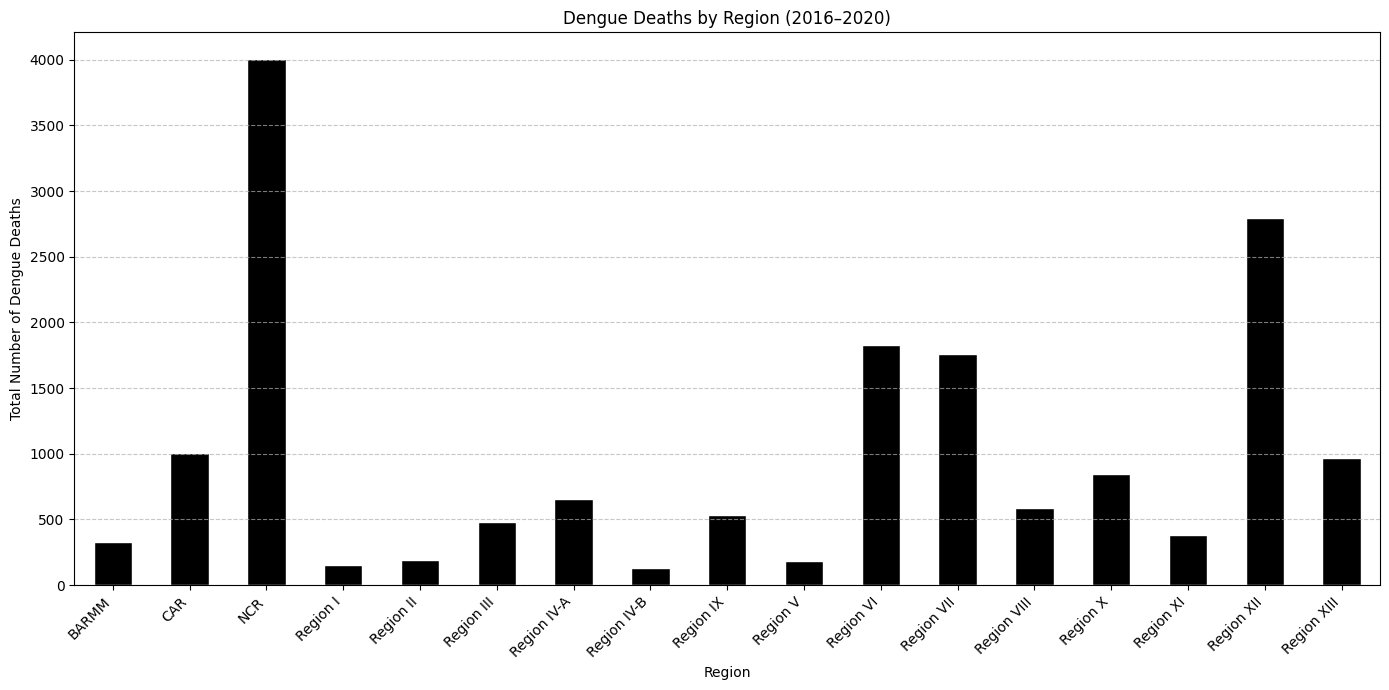

In [38]:
total_deaths = dengue.groupby("Region")["Dengue_Deaths"].sum()

plt.figure(figsize=(14, 7))
total_deaths.plot.bar(color='black', edgecolor='white')

plt.title('Dengue Deaths by Region (2016–2020)')
plt.xlabel('Region')
plt.ylabel('Total Number of Dengue Deaths')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<H2>INSIGHT 7:</H2>
<P>The graph shows that NCR had the highest number of dengue-related deaths from 2016 to 2020, followed by Region XII and Region VI. This suggests that areas with larger populations and denser communities are more vulnerable to severe dengue outbreaks.</P>
<H2>INSIGHT 8:</H2>
<P>On the other hand, Region I, Region II, Region IV-B,and Region V recorded the lowest number of dengue deaths, which may mean that these regions either experienced fewer dengue cases or had better control and prevention efforts during those years.
</P>

<H3>5. YEAR WITH HIGHEST DENGUE DEATHS AND DENGUE CASES</H3>

<Figure size 1400x700 with 0 Axes>

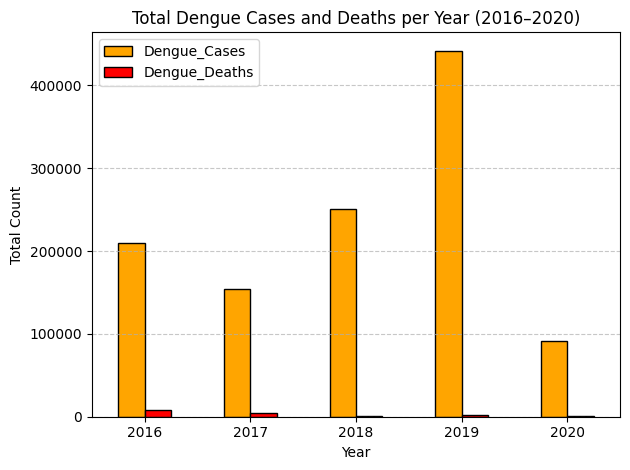

      Dengue_Cases  Dengue_Deaths
Year                             
2016        209544           8127
2017        154155           4563
2018        250783           1226
2019        441902           1733
2020         91041           1195


In [40]:
yearly_data = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum()

plt.figure(figsize=(14,7))
yearly_data.plot(kind="bar", color=["orange", "red"], edgecolor="black")

plt.title("Total Dengue Cases and Deaths per Year (2016–2020)")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

print(yearly_data)

<H2>INSIGHT 9:</H2>
<P>Based on the chart, in 2019, the number of dengue cases reached a peak of 441,902, which is much higher than in other years. This shows that 2019 experienced the most severe dengue outbreak during the 2016–2020 period.</P>
<H2>INSIGHT 10:</H2>
<P>Meanwhile, the year 2016 recorded the highest number of dengue deaths at 8,127, even though it did not have the most cases. This suggests that dengue cases in 2016 were more fatal compared to later years.</P>

<h1>PREDICTIVE</h1>